In [13]:
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8

Looking in indexes: https://test.pypi.org/simple/


In [14]:
from nbpep8.nbpep8 import pep8

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns
pep8(_ih)

In [16]:
from google.colab import drive

# Montez Google Drive
drive.mount('/content/drive')
pep8(_ih)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



In [18]:
import sys
sys.path.append('/content/drive/My Drive/IAEngineer/IAEngineer/P5')

from P5_Python import define_variable_clustering

In [19]:
olist_orders_dataset = pd.read_csv("/content/drive/My Drive/IAEngineer/IAEngineer/P5/archive/olist_orders_dataset.csv")
olist_customers_dataset = pd.read_csv("/content/drive/My Drive/IAEngineer/IAEngineer/P5/archive/olist_customers_dataset.csv")
pep8(_ih)

cell_content.py:1:80: E501 line too long (119 > 79 characters)
cell_content.py:2:80: E501 line too long (125 > 79 characters)



In [20]:
olist_orders_dataset.info()
olist_customers_dataset.info()
pep8(_ih)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null 

In [21]:
olist_orders_dataset.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [22]:
olist_orders_dataset.drop_duplicates()
olist_orders_dataset.info()
pep8(_ih)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB



In [23]:
olist_customers_dataset.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [24]:
olist_customers_dataset.drop_duplicates()
olist_customers_dataset.info()
pep8(_ih)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB



In [26]:
# Fusionner les deux dataframes 'olist_orders_dataset' et 'olist_customers_dataset' sur la colonne 'customer_id'
olist_orders_customers = pd.merge(
    olist_orders_dataset, olist_customers_dataset, on="customer_id")
pep8(_ih)

cell_content.py:1:80: E501 line too long (112 > 79 characters)



In [27]:
olist_orders_customers.info()
olist_orders_customers.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [29]:
olist_orders_customers.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

In [30]:
# Supprimer certaines colonnes que nous avons décidé de ne pas étudier
olist_orders_customers = olist_orders_customers.drop([
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'], axis=1)
pep8(_ih)

In [31]:
olist_orders_customers.info()
olist_orders_customers.head()
pep8(_ih)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
 4   customer_unique_id        99441 non-null  object
 5   customer_zip_code_prefix  99441 non-null  int64 
 6   customer_city             99441 non-null  object
 7   customer_state            99441 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.8+ MB



In [32]:
from datetime import datetime

# Convertissez la colonne de dates en format datetime
olist_orders_customers['order_purchase_timestamp'] = pd.to_datetime(
    olist_orders_customers['order_purchase_timestamp'])

# Calcul l'ancienneté de la commande en mois
custom_date = datetime(2019, 1, 1)
olist_orders_customers['order_purchase_in_months'] = (
    custom_date-olist_orders_customers['order_purchase_timestamp']
    ).astype('timedelta64[M]')
# Affichez le DataFrame avec la nouvelle colonne
print(
    olist_orders_customers[['order_purchase_timestamp',
                            'order_purchase_in_months']])
pep8(_ih)

      order_purchase_timestamp  order_purchase_in_months
0          2017-10-02 10:56:33                      14.0
1          2018-07-24 20:41:37                       5.0
2          2018-08-08 08:38:49                       4.0
3          2017-11-18 19:28:06                      13.0
4          2018-02-13 21:18:39                      10.0
...                        ...                       ...
99436      2017-03-09 09:54:05                      21.0
99437      2018-02-06 12:58:58                      10.0
99438      2017-08-27 14:46:43                      16.0
99439      2018-01-08 21:28:27                      11.0
99440      2018-03-08 20:57:30                       9.0

[99441 rows x 2 columns]



In [33]:
olist_order_items_dataset = pd.read_csv(
    "/content/drive/My Drive/IAEngineer/IAEngineer/P5/archive/olist_order_items_dataset.csv")
olist_order_payments_dataset = pd.read_csv(
    "/content/drive/My Drive/IAEngineer/IAEngineer/P5/archive/olist_order_payments_dataset.csv")
olist_order_reviews_dataset = pd.read_csv(
    "/content/drive/My Drive/IAEngineer/IAEngineer/P5/archive/olist_order_reviews_dataset.csv")
pep8(_ih)

cell_content.py:2:80: E501 line too long (93 > 79 characters)
cell_content.py:4:80: E501 line too long (96 > 79 characters)
cell_content.py:6:80: E501 line too long (95 > 79 characters)



In [34]:
olist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [35]:
# Supprimer certaines colonnes du dataframe que nous n'allons pas analyser dans ce cadre
columns_delete = ['review_creation_date',
                  'review_answer_timestamp',
                  'review_id']
olist_order_reviews_dataset.drop(columns_delete, inplace=True, axis=1)
pep8(_ih)

cell_content.py:1:80: E501 line too long (88 > 79 characters)



In [36]:
# Fusionner les deux dataframes 'olist_orders_customers' et 'olist_order_reviews_dataset' sur la colonne 'order_id'
olist_orders_customers = pd.merge(olist_orders_customers,
                                  olist_order_reviews_dataset,
                                  on="order_id")
olist_orders_customers.info()
pep8(_ih)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99224 entries, 0 to 99223
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99224 non-null  object        
 1   customer_id               99224 non-null  object        
 2   order_status              99224 non-null  object        
 3   order_purchase_timestamp  99224 non-null  datetime64[ns]
 4   customer_unique_id        99224 non-null  object        
 5   customer_zip_code_prefix  99224 non-null  int64         
 6   customer_city             99224 non-null  object        
 7   customer_state            99224 non-null  object        
 8   order_purchase_in_months  99224 non-null  float64       
 9   review_score              99224 non-null  int64         
 10  review_comment_title      11568 non-null  object        
 11  review_comment_message    40977 non-null  object        
dtypes: datetime64[ns](

In [37]:
olist_order_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [38]:
olist_order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [39]:
# Fusionner les deux dataframes 'olist_orders_customers' et 'olist_order_payments_dataset' sur la colonne 'order_id'
olist_orders_customers = pd.merge(olist_orders_customers,
                                  olist_order_payments_dataset,
                                  on="order_id")
olist_orders_customers.info()
pep8(_ih)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103677 entries, 0 to 103676
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103677 non-null  object        
 1   customer_id               103677 non-null  object        
 2   order_status              103677 non-null  object        
 3   order_purchase_timestamp  103677 non-null  datetime64[ns]
 4   customer_unique_id        103677 non-null  object        
 5   customer_zip_code_prefix  103677 non-null  int64         
 6   customer_city             103677 non-null  object        
 7   customer_state            103677 non-null  object        
 8   order_purchase_in_months  103677 non-null  float64       
 9   review_score              103677 non-null  int64         
 10  review_comment_title      11996 non-null   object        
 11  review_comment_message    42815 non-null   object        
 12  pa

In [40]:
olist_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [41]:
# Supprimer certaines colonnes du dataframe 'olist_orders_customers' qui sont en doublon ou hors scope avec le métier
olist_orders_customers.drop(['customer_zip_code_prefix',
                             'customer_city',
                             'payment_sequential',
                             'payment_type'],
                            axis=1, inplace=True)
olist_orders_customers.info()
pep8(_ih)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103677 entries, 0 to 103676
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103677 non-null  object        
 1   customer_id               103677 non-null  object        
 2   order_status              103677 non-null  object        
 3   order_purchase_timestamp  103677 non-null  datetime64[ns]
 4   customer_unique_id        103677 non-null  object        
 5   customer_state            103677 non-null  object        
 6   order_purchase_in_months  103677 non-null  float64       
 7   review_score              103677 non-null  int64         
 8   review_comment_title      11996 non-null   object        
 9   review_comment_message    42815 non-null   object        
 10  payment_installments      103677 non-null  int64         
 11  payment_value             103677 non-null  float64       
dtypes:

In [42]:
olist_orders_customers['order_status'].value_counts()

delivered      100649
shipped          1100
canceled          648
unavailable       637
invoiced          324
processing        314
created             3
approved            2
Name: order_status, dtype: int64

In [53]:
# Filtrer que sur les clients qui ont reçu leur commande
olist_orders_customers = olist_orders_customers[
    olist_orders_customers['order_status'] == 'delivered']
pep8(_ih)

In [54]:
olist_orders_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113921 entries, 0 to 113920
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  113921 non-null  object        
 1   customer_id               113921 non-null  object        
 2   order_status              113921 non-null  object        
 3   order_purchase_timestamp  113921 non-null  datetime64[ns]
 4   customer_unique_id        113921 non-null  object        
 5   customer_state            113921 non-null  object        
 6   order_purchase_in_months  113921 non-null  float64       
 7   review_score              113921 non-null  int64         
 8   review_comment_title      13518 non-null   object        
 9   review_comment_message    47800 non-null   object        
 10  payment_installments      113921 non-null  int64         
 11  payment_value             113921 non-null  float64       
 12  or

In [45]:
# Supprimer les commandes en doublon
duplicates0 = olist_orders_customers.duplicated().sum()
print(duplicates0)
pep8(_ih)

811



In [46]:
olist_orders_customers = olist_orders_customers.drop_duplicates()
pep8(_ih)

In [47]:
olist_orders_customers.describe()

,order_purchase_in_months,review_score,payment_installments,payment_value
count,99838.000000,99838.000000,99838.000000,99838.000000
mean,11.497266,4.153138,2.861526,153.435974
std,5.040921,1.286622,2.687500,213.340323
min,4.000000,1.000000,0.000000,0.000000
25%,7.000000,4.000000,1.000000,57.290000
50%,11.000000,5.000000,1.000000,100.000000
75%,15.000000,5.000000,4.000000,171.550000
max,26.000000,5.000000,24.000000,13664.080000


In [48]:
olist_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [49]:
olist_orders_customers = pd.merge(olist_orders_customers,
                                  olist_order_items_dataset,
                                  on="order_id")
olist_orders_customers.info()
pep8(_ih)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113921 entries, 0 to 113920
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  113921 non-null  object        
 1   customer_id               113921 non-null  object        
 2   order_status              113921 non-null  object        
 3   order_purchase_timestamp  113921 non-null  datetime64[ns]
 4   customer_unique_id        113921 non-null  object        
 5   customer_state            113921 non-null  object        
 6   order_purchase_in_months  113921 non-null  float64       
 7   review_score              113921 non-null  int64         
 8   review_comment_title      13518 non-null   object        
 9   review_comment_message    47800 non-null   object        
 10  payment_installments      113921 non-null  int64         
 11  payment_value             113921 non-null  float64       
 12  or

In [50]:
olist_orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_state,order_purchase_in_months,review_score,review_comment_title,review_comment_message,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,SP,14.0,4,NaN,"Não testei o produto ainda, mas ele veio corre...",1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,SP,14.0,4,NaN,"Não testei o produto ainda, mas ele veio corre...",1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,SP,14.0,4,NaN,"Não testei o produto ainda, mas ele veio corre...",1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,BA,5.0,4,Muito boa a loja,Muito bom o produto.,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,GO,4.0,5,NaN,NaN,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [51]:
# Compter le nombre commandes avec le meme order_id, mais pas le même total
duplicates = olist_orders_customers.drop(
    'payment_value',
    axis=1
    ).duplicated().sum()
print(duplicates)
pep8(_ih)

3186



In [52]:
duplicates2 = olist_orders_customers.duplicated().sum()
print(duplicates2)
pep8(_ih)

0



In [55]:
# Regrouper les données par les colonnes sélectionnées et sommer les 'payment_value' correspondants
cols_to_groupby = [
    col for col
    in olist_orders_customers.columns
    if col != 'payment_value'
    ]
olist_orders_customers_clean = olist_orders_customers.groupby(cols_to_groupby)[
    'payment_value'
    ].sum().reset_index()
pep8(_ih)

cell_content.py:1:80: E501 line too long (99 > 79 characters)



In [56]:
olist_orders_customers_clean.head()

,order_id,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_state,order_purchase_in_months,review_score,review_comment_title,review_comment_message,payment_installments,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_value
0,0006ec9db01a64e59a68b2c340bf65a7,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,7ed0ea20347f67fe61d1c99fdf8556ae,RJ,5.0,5,Boa,Excelente serviço de compras on line.,4,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.0,23.32,97.32
1,000aed2e25dbad2f9ddb70584c5a2ded,fff5169e583fd07fac9fec88962f189d,delivered,2018-05-11 20:33:38,6457be0b331148fb5454efc88d1e03d9,SP,7.0,1,produto não entregue,Mudo minha opinião assim que receber o produto...,1,1,4fa33915031a8cde03dd0d3e8fb27f01,fe2032dab1a61af8794248c8196565c9,2018-05-16 20:57:03,144.0,8.77,152.77
2,00130c0eee84a3d909e75bc08c5c3ca1,47d656c08a282ec5ab4c1f18303a3a30,delivered,2018-06-11 21:17:00,b5910f24d2483d697b37e3857b621061,SP,6.0,5,Super Recomendo,"Produto entregue adequadamente e muito rápido,...",1,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,2018-06-14 05:16:24,27.9,7.94,35.84
3,001e7cf2ad6bef3ade12ebc56ceaf0f3,d1684ed69f8fd574b7c344de923f379a,delivered,2018-05-19 10:29:23,43860f86362fea12550bfa19ef73015f,MG,7.0,1,Pessima,O produto chegou e estragou sozinho,2,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-05-22 10:59:50,35.9,15.20,51.10
4,002175704e8b209f61b9ad5cfd92b60e,a562db3c7cb9a68947debd30879b491e,delivered,2018-04-22 12:13:25,e7d41c19da317af0612170197303d5a9,SP,8.0,4,Recomendo,Produto como descrito. Mas não gostei pq o som...,3,1,e6b6e13cf71449a457269f425b89dc74,b2ba3715d723d245138f291a6fe42594,2018-04-26 12:30:57,109.9,13.21,123.11


In [58]:
# Compter les commandes qui ont un prix total inférieur au prix d'un seul produit
condition = olist_orders_customers_clean[
    'payment_value'] < olist_orders_customers_clean['price']
count = olist_orders_customers_clean[condition].shape[0]
print(count)
pep8(_ih)

153
cell_content.py:1:80: E501 line too long (81 > 79 characters)



In [59]:
# N'ayant aucune info, j'ai décidé de supprimer les commandes qui ont un prix total inférieur au prix d'un seul produit
olist_orders_customers_clean = olist_orders_customers_clean[~condition]
pep8(_ih)

cell_content.py:1:80: E501 line too long (119 > 79 characters)



In [61]:
condition = olist_orders_customers_clean[
    'payment_value'] < olist_orders_customers_clean['price']
count = olist_orders_customers_clean[condition].shape[0]
print(count)
pep8(_ih)

0



In [62]:
# Utilisez la méthode .nunique() pour compter le nombre de clients uniques
nombre_de_clients = olist_orders_customers_clean[
    'customer_unique_id'].nunique()

# Affichez le nombre de clients
print("Le nombre de clients uniques est :",
      nombre_de_clients)
pep8(_ih)

Le nombre de clients uniques est : 9316



In [63]:
# Comptez le nombre unique d'`order_id` pour chaque `customer_unique_id`
order_count_by_customer = olist_orders_customers_clean.groupby(
    'customer_unique_id')[
        'order_id'
    ].nunique()

# Liste des clients avec plusierus orders
customers_with_different_orders = order_count_by_customer[
    order_count_by_customer >= 2
    ].index.tolist()

olist_orders_customers_loyaux = olist_orders_customers_clean[
    olist_orders_customers_clean[
        'customer_unique_id'
        ].isin(
            customers_with_different_orders)]

pep8(_ih)

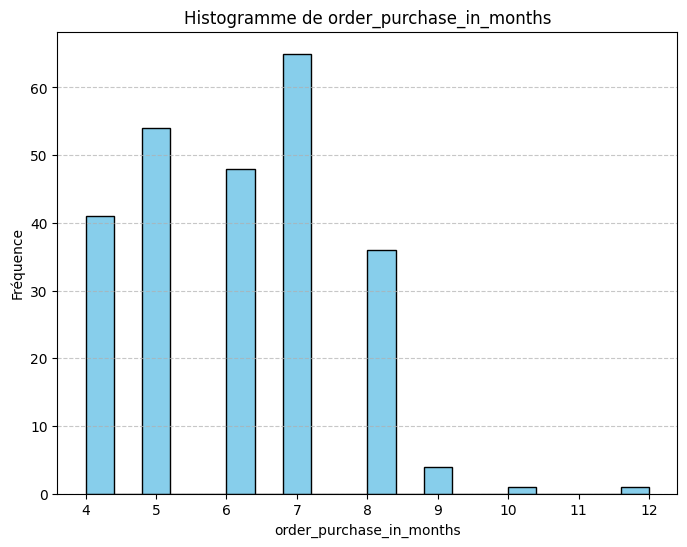

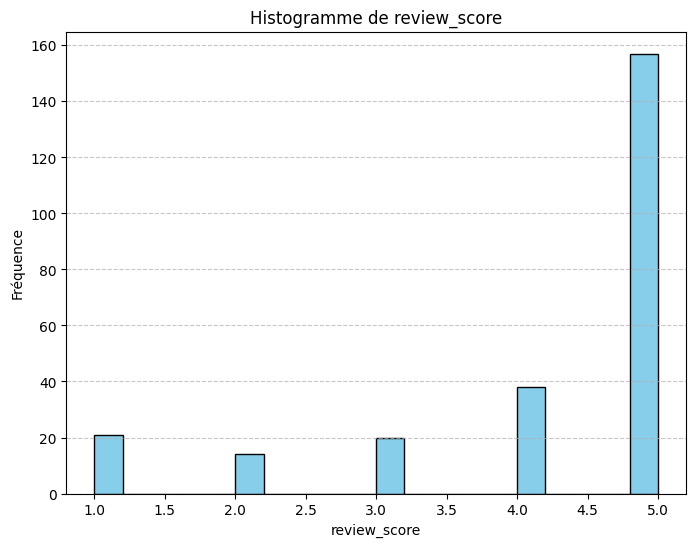

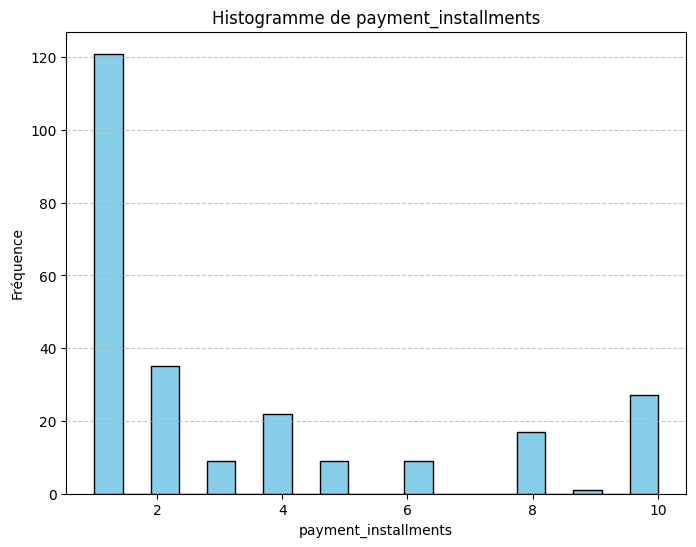

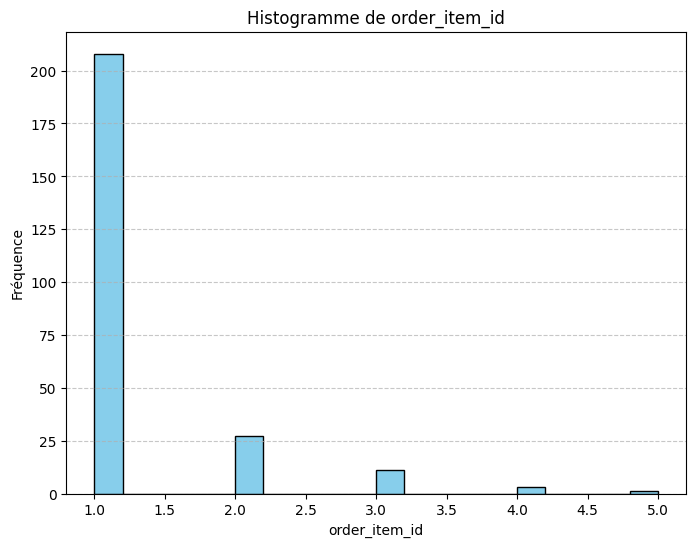

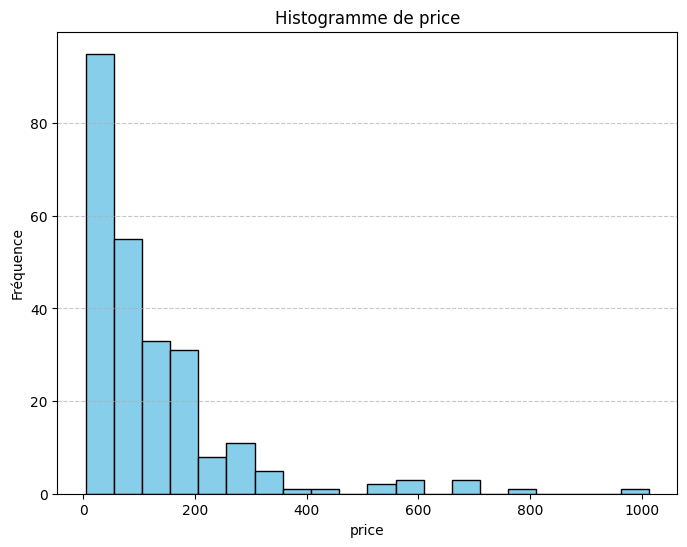

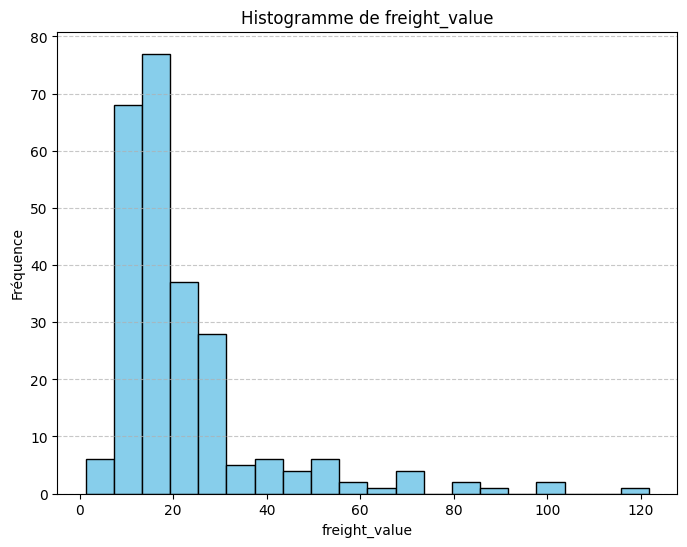

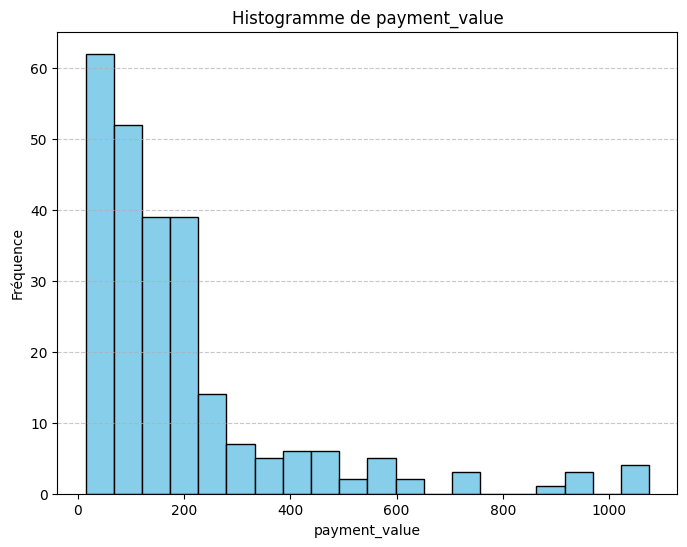

In [64]:
# filtrez les colonnes numériques de votre DataFrame
numeric_columns = olist_orders_customers_loyaux.select_dtypes(
    include=['int64', 'float64'])

# histogramme pour chaque colonne numérique
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(olist_orders_customers_loyaux[column],
             bins=20,
             color='skyblue',
             edgecolor='black')
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
pep8(_ih)

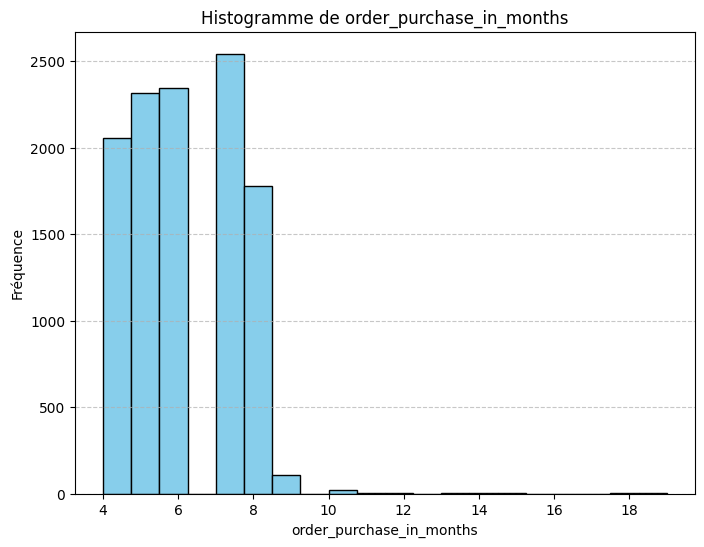

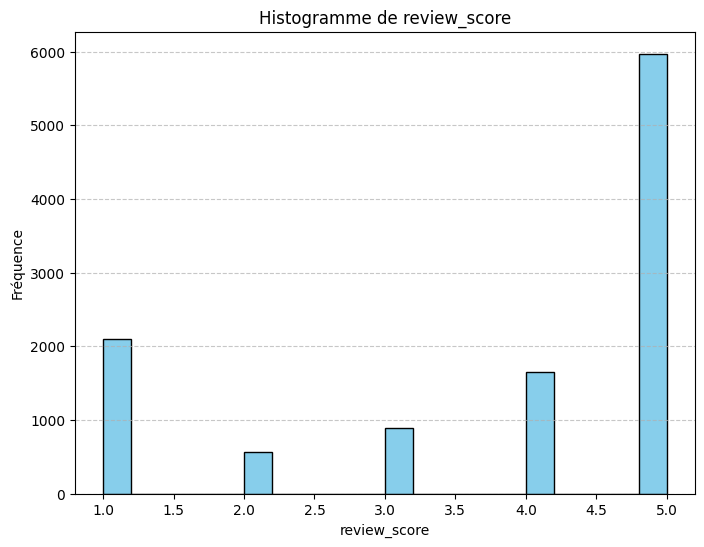

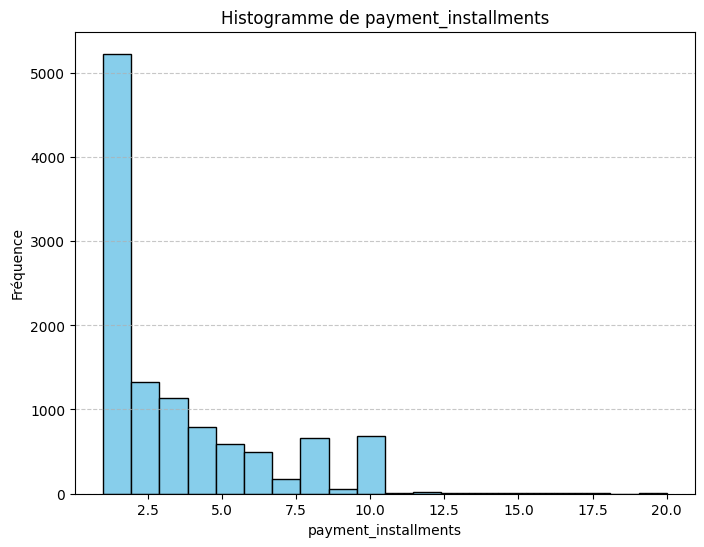

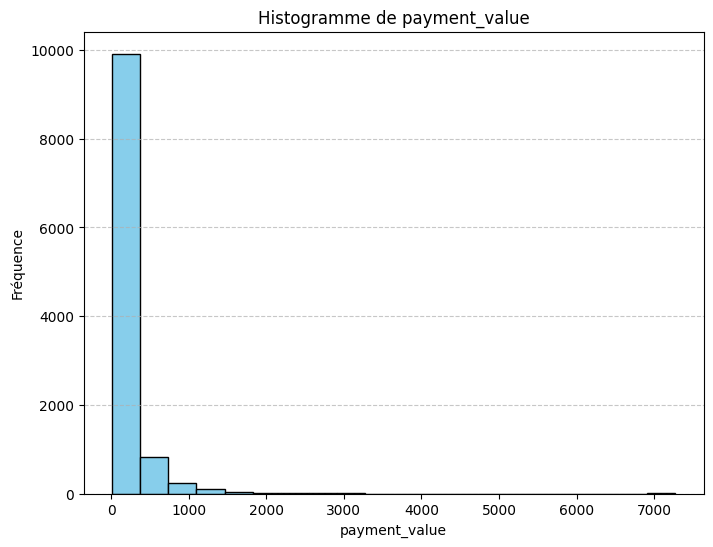

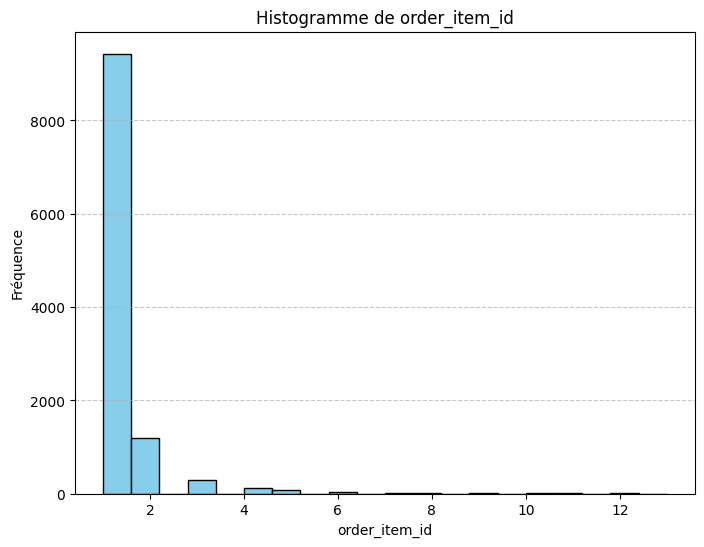

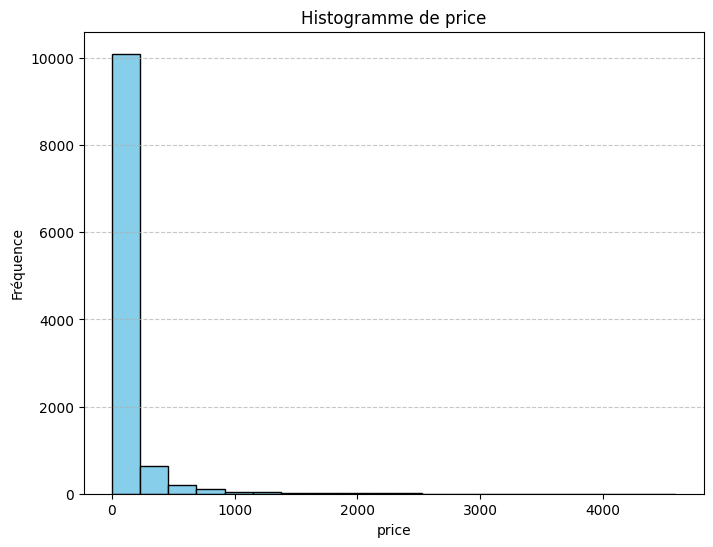

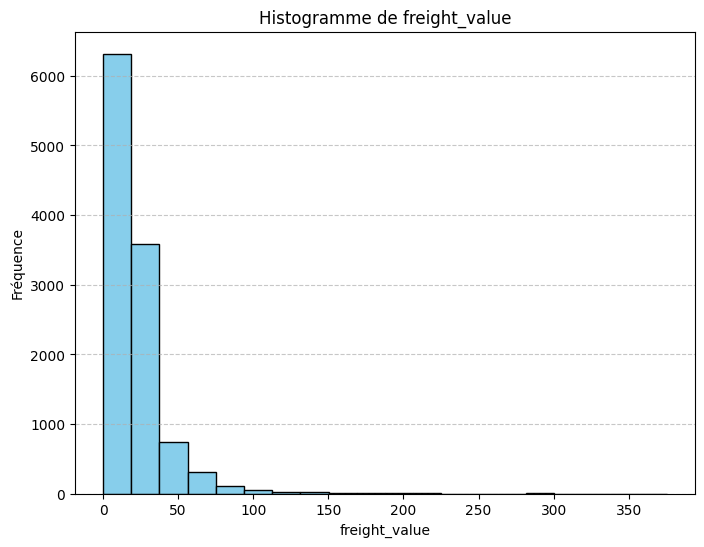

In [65]:
# Filtrer les colonnes numériques de votre DataFrame
numeric_columns = olist_orders_customers.select_dtypes(
    include=['int64', 'float64'])

# histogramme pour chaque colonne numérique
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(olist_orders_customers_clean[column],
             bins=20,
             color='skyblue',
             edgecolor='black'
             )
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
pep8(_ih)

In [66]:
olist_orders_customers_loyaux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 26 to 11315
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  250 non-null    object        
 1   customer_id               250 non-null    object        
 2   order_status              250 non-null    object        
 3   order_purchase_timestamp  250 non-null    datetime64[ns]
 4   customer_unique_id        250 non-null    object        
 5   customer_state            250 non-null    object        
 6   order_purchase_in_months  250 non-null    float64       
 7   review_score              250 non-null    int64         
 8   review_comment_title      250 non-null    object        
 9   review_comment_message    250 non-null    object        
 10  payment_installments      250 non-null    int64         
 11  order_item_id             250 non-null    int64         
 12  product_id         

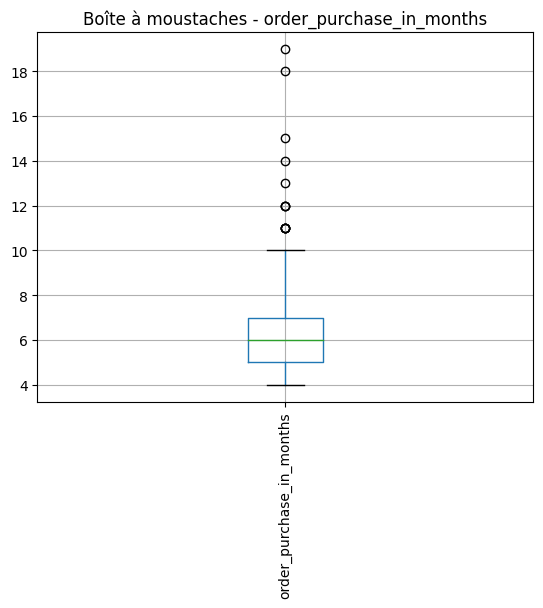

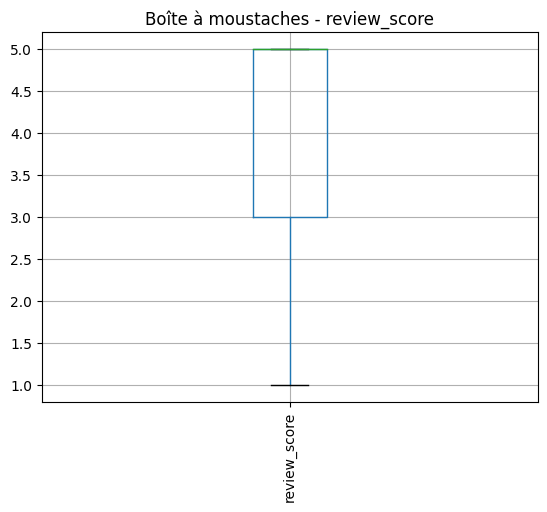

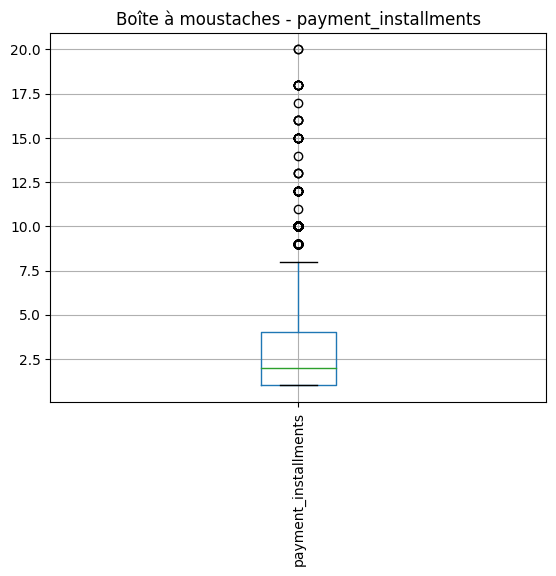

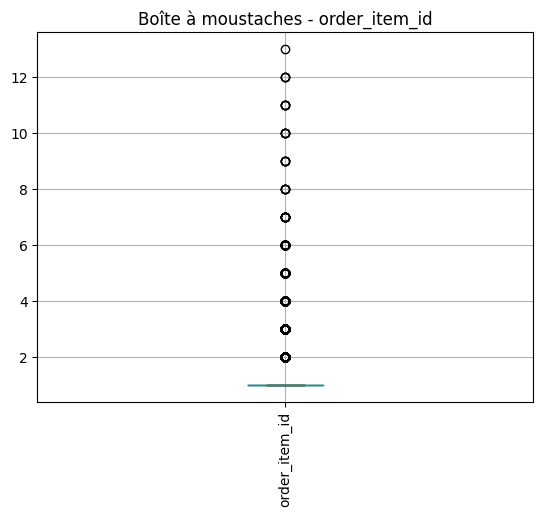

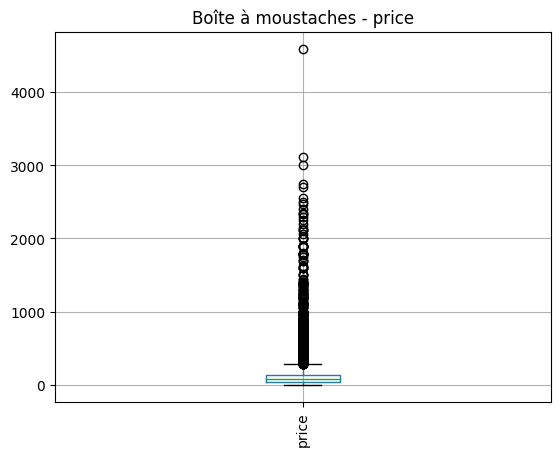

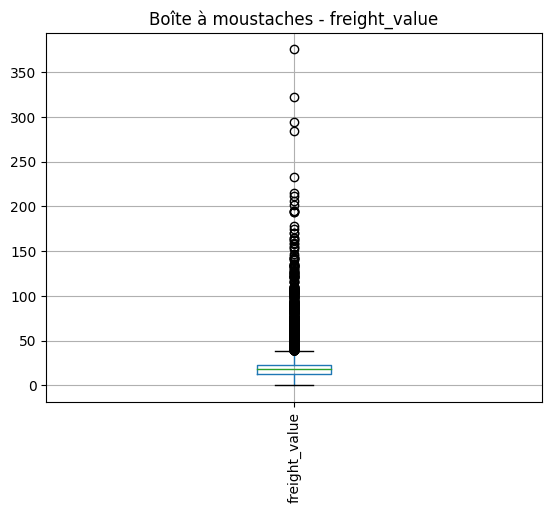

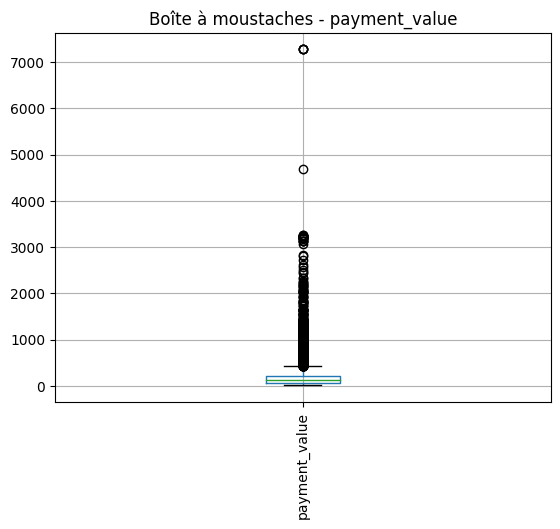

In [67]:
for i in olist_orders_customers_clean.columns:
    if pd.api.types.is_numeric_dtype(olist_orders_customers_clean[i]):
        olist_orders_customers_clean.boxplot(column=i)
        plt.xticks(rotation='vertical')
        plt.title(f"Boîte à moustaches - {i}")
        plt.show()
    else:

        plt.show()
pep8(_ih)

In [68]:
olist_orders_customers_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11179 entries, 0 to 11331
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  11179 non-null  object        
 1   customer_id               11179 non-null  object        
 2   order_status              11179 non-null  object        
 3   order_purchase_timestamp  11179 non-null  datetime64[ns]
 4   customer_unique_id        11179 non-null  object        
 5   customer_state            11179 non-null  object        
 6   order_purchase_in_months  11179 non-null  float64       
 7   review_score              11179 non-null  int64         
 8   review_comment_title      11179 non-null  object        
 9   review_comment_message    11179 non-null  object        
 10  payment_installments      11179 non-null  int64         
 11  order_item_id             11179 non-null  int64         
 12  product_id        

In [69]:
olist_orders_customers_clean.describe()

,order_purchase_in_months,review_score,payment_installments,order_item_id,price,freight_value,payment_value
count,11179.000000,11179.000000,11179.000000,11179.000000,11179.000000,11179.000000,11179.000000
mean,6.014849,3.789695,3.119510,1.257089,129.065896,21.871332,204.254182
std,1.409891,1.569428,2.855598,0.789033,203.969348,18.667435,306.320982
min,4.000000,1.000000,1.000000,1.000000,0.850000,0.000000,8.100000
25%,5.000000,3.000000,1.000000,1.000000,40.000000,12.870000,71.655000
50%,6.000000,5.000000,2.000000,1.000000,79.000000,18.230000,127.640000
75%,7.000000,5.000000,4.000000,1.000000,139.000000,23.345000,215.290000
max,19.000000,5.000000,20.000000,13.000000,4590.000000,375.280000,7274.880000


In [70]:
# Exporter ce dataset propre pour une utilisation ultérieure.
olist_orders_customers_clean.to_csv('/content/drive/My Drive/IAEngineer/IAEngineer/P5/archive/olist_orders_customers_clean.csv', index=False)